### Import libraries

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pylab as plt
import seaborn as sns
sns.set()

random_state = 20211006

In [15]:
# load dataset
dataset = load_boston()

In [16]:
df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
df["PRICES"] = dataset.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


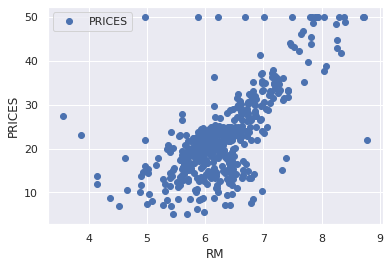

In [17]:
# check the dataset
df.plot(x="RM", y="PRICES", style="o")
plt.ylabel("PRICES")
plt.show()

In [18]:
TargetName = "PRICES"
FeaturesName = [\
              #-- "Crime occurrence rate per unit population by town"
              "CRIM",\
              #-- "Percentage of 25000-squared-feet-area house"
              'ZN',\
              #-- "Percentage of non-retail land area by town"
              'INDUS',\
              #-- "Index for Charlse river: 0 is near, 1 is far"
              'CHAS',\
              #-- "Nitrogen compound concentration"
              'NOX',\
              #-- "Average number of rooms per residence"
              'RM',\
              #-- "Percentage of buildings built before 1940"
              'AGE',\
              #-- 'Weighted distance from five employment centers'
              "DIS",\
              ##-- "Index for easy access to highway"
              'RAD',\
              ##-- "Tax rate per $100,000"
              'TAX',\
              ##-- "Percentage of students and teachers in each town"
              'PTRATIO',\
              ##-- "1000(Bk - 0.63)^2, where Bk is the percentage of Black people"
              'B',\
              ##-- "Percentage of low-class population"
              'LSTAT',\
              ]

In [19]:
# X: explanatory data, y: target data
X = df[FeaturesName]
y = df[TargetName]

In [20]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [21]:
# Create a model instance
regressor = DecisionTreeRegressor(random_state=random_state)

# Train the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=20211006, splitter='best')

In [22]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

### $R^{2}$ value

In [23]:
R2 = r2_score(y_test, y_pred_test)
print("R2 value: {:.2}".format(R2))

R2 value: 0.84


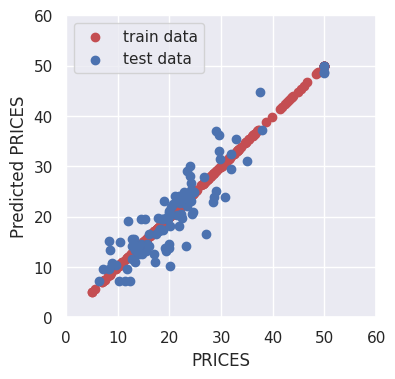

In [24]:
plt.figure(figsize=(4, 4), dpi=100)
plt.xlabel("PRICES")
plt.ylabel("Predicted PRICES")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.scatter(y_train, y_pred_train, lw=1, color="r", label="train data")
plt.scatter(y_test, y_pred_test, lw=1, color="b", label="test data")
plt.legend()
plt.show()

## Grid Search CV

In [25]:
# Confirm the hyper parameters
print(regressor.get_params)

<bound method BaseEstimator.get_params of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=20211006, splitter='best')>


In [26]:
from sklearn.model_selection import GridSearchCV

# Prepare a hyperparameter candidates
max_depth = np.arange(1, 10)
params = {'max_depth':max_depth}

# Define a Grid Search as gs
# scoring: r2, neg_mean_squared_error
gs = GridSearchCV(regressor, params, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [27]:
# Execute a grid search
gs.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=20211006,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
 

In [28]:
# Evaluate the score
score_train = gs.cv_results_['mean_train_score']
score_test = gs.cv_results_['mean_test_score']
print(f"train_score: {score_train}")
print(f"test_score: {score_test}")

train_score: [-43.53721086 -23.72252296 -14.16199233  -8.74291913  -5.88857448
  -3.99244979  -2.7070591   -1.69424145  -1.08990215]
test_score: [-67.93740688 -41.63263431 -35.67237181 -36.54639912 -38.71562358
 -38.79161448 -34.51835548 -38.87853702 -38.62034595]


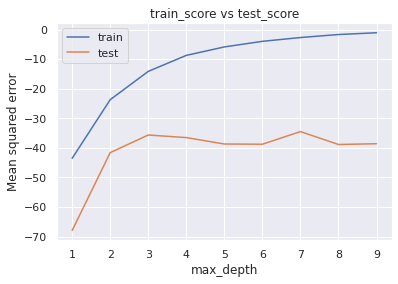

In [29]:

plt.plot(max_depth, score_train, label="train")
plt.plot(max_depth, score_test, label="test")

plt.title('train_score vs test_score')
plt.xlabel('max_depth')
plt.ylabel('Mean squared error')

plt.legend()
plt.show()

In [30]:
# Best parameters
print(gs.best_params_ )

{'max_depth': 7}


In [31]:
# Best-parameter model
regressor_best = gs.best_estimator_

y_pred_train = regressor_best.predict(X_train)
y_pred_test = regressor_best.predict(X_test)

In [32]:
R2 = r2_score(y_test, y_pred_test)
print("R2 value: {:.2}".format(R2))

R2 value: 0.95


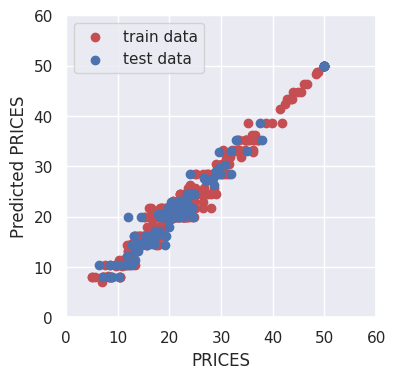

In [33]:
plt.figure(figsize=(4, 4), dpi=100)
plt.xlabel("PRICES")
plt.ylabel("Predicted PRICES")
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.scatter(y_train, y_pred_train, lw=1, color="r", label="train data")
plt.scatter(y_test, y_pred_test, lw=1, color="b", label="test data")
plt.legend()
plt.show()